* 計算時間
    - 全体の実行時間
        - k=1,2,3,...,50それぞれの実行時間(ログを残しておけば1回で計測可能)
* 求めたシードに対する影響数
    - 各シード(2個ずつで計25回)に対して、10000回のシュミレーション

* データ
    - 各データに関して行う

* どのノードを通ったのか?
    - 通っていないまたは、通ることが少ないノードを特定すれば面白いかも

In [39]:
import itertools
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm_notebook as tqdm
import pandas as pd
from InfMaxProblem import Monte_Carlo as mc
import collections
from multiprocessing import Pool

%matplotlib inline

In [48]:
def experiment_IC(G, seed, T=10000):
    inf_sum = 0
    inf_size_list = []
    for i in tqdm(range(T)):
        simulation = mc.IC_simulation(G, seed)
        
        # 影響数
        inf_sum += simulation
        inf_size_list.append(inf_sum / (i+1))
    return inf_size_list, inf_sum/T

In [49]:
def IC_simulation_wrapper(args):
    return mc.IC_simulation(*args)

In [50]:
def experiment_IC_mult(G, seed, T=10000):
    with Pool(processes=4) as p:
        values = [(G, seed) for t in range(T)]
        result = p.map(IC_simulation_wrapper, values)
    return sum(result)/T

# データの読み込み

In [42]:
# 枝確率を計算済みのネットワークを読み込む
network = pd.read_csv("data.csv")
network.head()

,# FromNodeId,ToNodeId,WC
0,0,4,0.111111
1,0,5,0.090909
2,0,7,0.333333
3,0,8,0.250000
4,0,9,0.333333


In [43]:
# numpy型に変換
network_np = network.values

In [44]:
# 空の有向グラフを作成
G = nx.DiGraph()

In [45]:
# 重み付きの枝を加える
G.add_weighted_edges_from(network_np)

In [46]:
seed = pd.DataFrame({"data":[i for i in range(10)]})

seed = pd.DataFrame({"WC":[i for i in range(10)]}).values.reshape(-1,)

In [47]:
%time experiment_IC(G, seed, T=10000)

/home/fueki/anaconda3/envs/all/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.



CPU times: user 8.19 s, sys: 1.02 s, total: 9.21 s
Wall time: 7.73 s


([20.0,
  18.5,
  18.333333333333332,
  18.75,
  18.8,
  20.0,
  20.857142857142858,
  20.25,
  20.555555555555557,
  20.5,
  20.727272727272727,
  20.5,
  20.153846153846153,
  20.214285714285715,
  20.466666666666665,
  20.9375,
  21.176470588235293,
  21.0,
  21.0,
  20.6,
  20.523809523809526,
  20.59090909090909,
  20.82608695652174,
  21.041666666666668,
  21.28,
  21.23076923076923,
  21.37037037037037,
  21.392857142857142,
  21.20689655172414,
  21.066666666666666,
  21.161290322580644,
  21.09375,
  21.0,
  20.91176470588235,
  20.97142857142857,
  21.055555555555557,
  21.054054054054053,
  21.0,
  21.025641025641026,
  21.15,
  21.195121951219512,
  21.261904761904763,
  21.232558139534884,
  21.40909090909091,
  21.444444444444443,
  21.347826086956523,
  21.25531914893617,
  21.166666666666668,
  21.122448979591837,
  21.1,
  21.176470588235293,
  21.23076923076923,
  21.11320754716981,
  21.14814814814815,
  21.09090909090909,
  21.035714285714285,
  21.157894736842106,


In [51]:
%time experiment_IC_mult(G, seed, T=10000)

CPU times: user 261 ms, sys: 96.8 ms, total: 357 ms
Wall time: 2.16 s


21.2488

並列処理したほうが高速になる

In [8]:
inf_size_process_list = []
inf_size_list = []
for s in tqdm(range(0,10,1)):
    inf_size_process, inf_size = experiment_IC(G, seed[:s],10000)
    inf_size_process_list.append(inf_size_process)
    inf_size_list.append(inf_size)

/home/fueki/anaconda3/envs/all/lib/python3.7/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


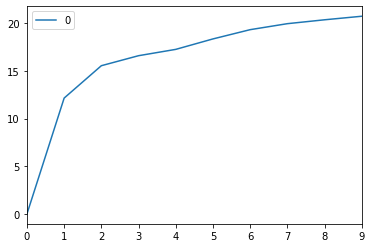

In [9]:
pd.DataFrame(inf_size_list, index=range(0,10,1)).plot()

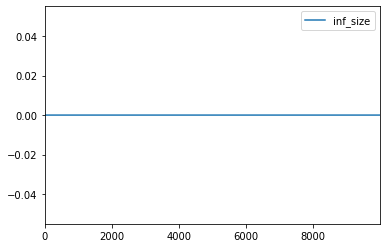

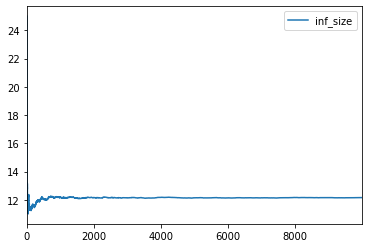

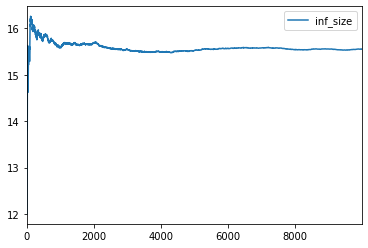

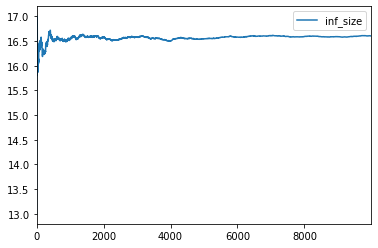

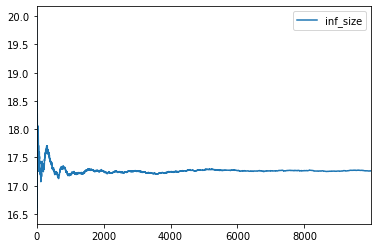

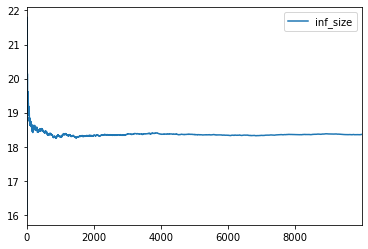

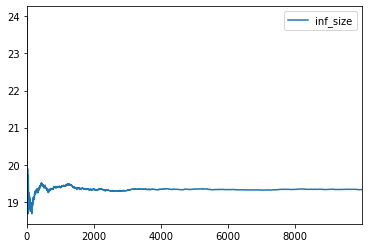

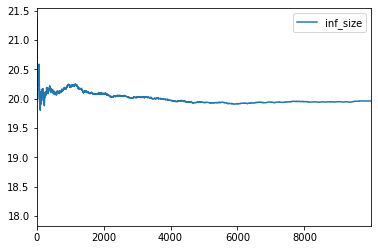

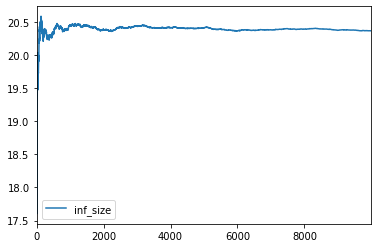

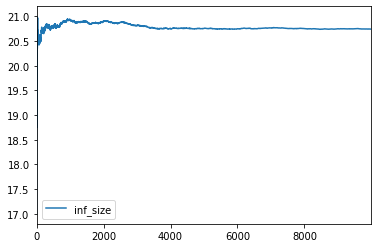

In [10]:
for i in range(10):
    pd.DataFrame(inf_size_process_list[i], columns=["inf_size"]).plot()
    plt.show()

In [11]:
# V_reach, V_pass, inf_size = experiment_IC(G, [3,0])

# pd.DataFrame.from_dict(V_reach, orient='index', columns=["reach_size"]).sort_values("reach_size", ascending=False)

# pd.DataFrame.from_dict(V_pass, orient='index', columns=["pass_times"]).sort_values("pass_times", ascending=False)

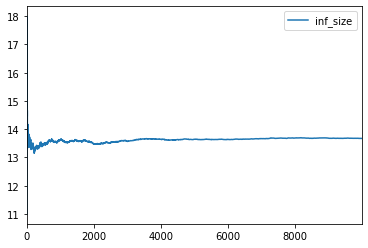

In [12]:
inf_size_list, inf_size = experiment_IC(G, [3,0])
pd.DataFrame(inf_size_list, columns=["inf_size"]).plot()

# Epinions

In [75]:
# resultフォルダからseedを取り出す
seed_df = pd.read_csv("result/Epinions/seed.csv")

## WC

In [76]:
# 枝確率を計算済みのネットワークを読み込む
network = pd.read_csv("data/Epinions/WC.csv")
network.head()

,# FromNodeId,ToNodeId,WC
0,0,4,0.008000
1,0,5,0.005682
2,0,7,0.033333
3,0,8,0.009615
4,0,9,0.066667


In [77]:
# numpy型に変換
network_np = network.values

In [78]:
G = nx.DiGraph()
G.add_weighted_edges_from(network_np)

In [79]:
seed = seed_df["WC"].values
seed

array([7.6300e+02, 6.3400e+02, 6.4500e+02, 5.2320e+03, 7.1399e+04,
       3.9240e+03, 1.8350e+03, 5.2270e+03, 6.3700e+02, 2.9690e+03,
       1.0590e+03, 1.4500e+02, 4.9200e+03, 2.0660e+03, 1.2250e+03,
       7.0470e+03, 1.7200e+03, 2.7040e+03, 1.5960e+03, 9.4120e+03,
       1.5390e+03, 5.2240e+03, 1.6690e+03, 6.2900e+02, 1.5330e+03,
       4.4000e+01, 5.1440e+03, 8.2400e+02, 6.0030e+03, 7.7000e+02,
       1.1720e+03, 6.7740e+03, 2.1180e+03, 1.4090e+03, 3.8500e+03,
       7.1388e+04, 1.5010e+03, 3.5270e+03, 1.6248e+04, 6.6100e+02,
       7.3920e+03, 4.9310e+03, 6.5000e+02, 5.3820e+03, 5.4600e+02,
       6.4890e+03, 3.4150e+03, 1.7270e+03, 7.3940e+03, 7.6870e+03])

In [ ]:
inf_size_list = []
for s in tqdm(range(0,51,2)):
    inf_size = experiment_IC_mult(G, seed[:s])
    inf_size_list.append(inf_size)

/home/fueki/anaconda3/envs/all/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [ ]:
WC_spread = pd.DataFrame(inf_size_list, index=range(0,51,2))
WC_spread.to_csv("result/Epinions/WC_spread.csv")
WC_spread.plot()

## TR

In [ ]:
# 枝確率を計算済みのネットワークを読み込む
network = pd.read_csv("data/Epinions/TR.csv")
network.head()

In [ ]:
# numpy型に変換
network_np = network.values

In [ ]:
G = nx.DiGraph()
G.add_weighted_edges_from(network_np)

In [ ]:
seed = seed_df["TR"].values
seed

In [ ]:
inf_size_list = []
for s in tqdm(range(0,51,2)):
    inf_size = experiment_IC_mult(G, seed[:s])
    inf_size_list.append(inf_size)

In [ ]:
TR_spread = pd.DataFrame(inf_size_list, index=range(0,51,2))
TR_spread.to_csv("result/Epinions/TR_spread.csv")
TR_spread.plot()

## P=0.1

In [ ]:
# 枝確率を計算済みのネットワークを読み込む
network = pd.read_csv("data/Epinions/P=0_1.csv")
network.head()

In [ ]:
# numpy型に変換
network_np = network.values

In [ ]:
G = nx.DiGraph()
G.add_weighted_edges_from(network_np)

In [ ]:
seed = seed_df["P=0_1"].values
seed

In [ ]:
inf_size_list = []
for s in tqdm(range(0,51,2)):
    inf_size = experiment_IC_mult(G, seed[:s])
    inf_size_list.append(inf_size)

In [ ]:
P01_spread = pd.DataFrame(inf_size_list, index=range(0,51,2))
P01_spread.to_csv("result/Epinions/P01_spread.csv")
P01_spread.plot()

## P=0.01

In [ ]:
# 枝確率を計算済みのネットワークを読み込む
network = pd.read_csv("data/Epinions/P=0_01.csv")
network.head()

In [ ]:
# numpy型に変換
network_np = network.values

In [ ]:
G = nx.DiGraph()
G.add_weighted_edges_from(network_np)

In [ ]:
seed = seed_df["P=0_01"].values
seed

In [ ]:
inf_size_list = []
for s in tqdm(range(0,51,2)):
    inf_size = experiment_IC_mult(G, seed[:s])
    inf_size_list.append(inf_size)

In [ ]:
P001_spread = pd.DataFrame(inf_size_list, index=range(0,51,2))
P001_spread.to_csv("result/Epinions/P001_spread.csv")
P001_spread.plot()

## P=0.001

In [ ]:
# 枝確率を計算済みのネットワークを読み込む
network = pd.read_csv("data/Epinions/P=0_001.csv")
network.head()

In [ ]:
# numpy型に変換
network_np = network.values

In [ ]:
G = nx.DiGraph()
G.add_weighted_edges_from(network_np)

In [ ]:
seed = seed_df["P=0_001"].values
seed

In [ ]:
inf_size_list = []
for s in tqdm(range(0,51,2)):
    inf_size = experiment_IC_mult(G, seed[:s])
    inf_size_list.append(inf_size)

In [ ]:
P0001_spread = pd.DataFrame(inf_size_list, index=range(0,51,2))
P0001_spread.to_csv("result/Epinions/P0001_spread.csv")
P0001_spread.plot()

# 結果

In [ ]:
result = pd.concat([WC_spread,TR_spread,P01_spread,P001_spread,P0001_spread],axis=1)
result.plot()

In [ ]:
# いろいろなアルゴリズムが存在している
# https://github.com/nd7141/influence-maximization/tree/master/IC

In [1]:
# IMMの実装
# https://github.com/snowgy/Influence_Maximization

In [ ]:
# シンプルなシュミレーションとCELFの実装
# https://github.com/ethen8181/machine-learning/blob/master/networkx/max_influence/max_influence.ipynb